In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn8s_model import Fcn8sModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn8s_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: default
batch_size: 2
checkpoint_dir: ./experiments\fcn8s_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn8s_kittiroad
final_model_dir: ./experiments\fcn8s_kittiroad\saved_model/
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 30
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn8s_kittiroad\summary/



In [2]:
path = "./pretrained/vgg16.npy"

In [3]:
tf.reset_default_graph()

model = Fcn8sModel(config)
model.build(path)

npy file loaded
dict_keys(['conv5_1', 'fc6', 'conv5_3', 'conv5_2', 'fc8', 'fc7', 'conv4_1', 'conv4_2', 'conv4_3', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1'])
Model built successfully.


In [4]:
print('trainable variables')
for v in tf.trainable_variables():
    print(v.name, v.get_shape().as_list(),v.trainable)

trainable variables
conv1_1/filter:0 [3, 3, 3, 64] True
conv1_1/biases:0 [64] True
conv1_2/filter:0 [3, 3, 64, 64] True
conv1_2/biases:0 [64] True
conv2_1/filter:0 [3, 3, 64, 128] True
conv2_1/biases:0 [128] True
conv2_2/filter:0 [3, 3, 128, 128] True
conv2_2/biases:0 [128] True
conv3_1/filter:0 [3, 3, 128, 256] True
conv3_1/biases:0 [256] True
conv3_2/filter:0 [3, 3, 256, 256] True
conv3_2/biases:0 [256] True
conv3_3/filter:0 [3, 3, 256, 256] True
conv3_3/biases:0 [256] True
conv4_1/filter:0 [3, 3, 256, 512] True
conv4_1/biases:0 [512] True
conv4_2/filter:0 [3, 3, 512, 512] True
conv4_2/biases:0 [512] True
conv4_3/filter:0 [3, 3, 512, 512] True
conv4_3/biases:0 [512] True
conv5_1/filter:0 [3, 3, 512, 512] True
conv5_1/biases:0 [512] True
conv5_2/filter:0 [3, 3, 512, 512] True
conv5_2/biases:0 [512] True
conv5_3/filter:0 [3, 3, 512, 512] True
conv5_3/biases:0 [512] True
fc_6/kernel:0 [7, 7, 512, 4096] True
fc_6/bias:0 [4096] True
fc_7/kernel:0 [1, 1, 4096, 4096] True
fc_7/bias:0 [4096]

In [5]:
print('trainable variables')
for v in model.train_vars:
    print(v.name, v.get_shape().as_list(),v.trainable)

trainable variables
fc_6/kernel:0 [7, 7, 512, 4096] True
fc_6/bias:0 [4096] True
fc_7/kernel:0 [1, 1, 4096, 4096] True
fc_7/bias:0 [4096] True
conv7_1x1/kernel:0 [1, 1, 4096, 2] True
conv7_1x1/bias:0 [2] True
deconv7/kernel:0 [4, 4, 2, 2] True
deconv7/bias:0 [2] True
pool4_1x1/kernel:0 [1, 1, 512, 2] True
pool4_1x1/bias:0 [2] True
deconv_fuse1/kernel:0 [4, 4, 2, 2] True
deconv_fuse1/bias:0 [2] True
pool3_1x1/kernel:0 [1, 1, 256, 2] True
pool3_1x1/bias:0 [2] True
logits/kernel:0 [16, 16, 2, 2] True
logits/bias:0 [2] True


Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 480, 3)
Size of masks collection :  (578, 320, 480)


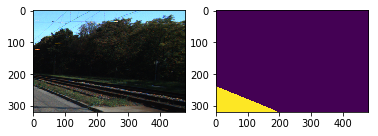

In [6]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [7]:
# create a builder for saving the model 
builder = tf.saved_model.builder.SavedModelBuilder(config.final_model_dir)

In [8]:
with tf.Session() as sess : 
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    trainer.train()
    model.load(sess)
    print("Saving the final model..")
    builder.add_meta_graph_and_variables(sess,
                                       [tf.saved_model.tag_constants.TRAINING],
                                       signature_def_map=None,
                                       assets_collection=None)
builder.save()
print("Final model saved")

Variables initialized
Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:33<00:00,  5.06s/it]


-->Last epoch loss     :  1.7662529
-->Last epoch accuracy :  0.44213006
-->Last test loss      :  1.4137082
-->Last test accuracy  :  0.698559
[BEST LOST : 1.413708209991455]
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:36<00:00,  5.06s/it]


-->Last epoch loss     :  0.91079056
-->Last epoch accuracy :  0.88678247
-->Last test loss      :  0.6358315
-->Last test accuracy  :  0.93700397
[BEST LOST : 0.6358314752578735]
Saving model...
Model saved
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:39<00:00,  5.41s/it]


-->Last epoch loss     :  0.43821263
-->Last epoch accuracy :  0.96294725
-->Last test loss      :  0.4637793
-->Last test accuracy  :  0.9532685
[BEST LOST : 0.4637793004512787]
Saving model...
Model saved
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:30<00:00,  5.10s/it]


-->Last epoch loss     :  0.35845912
-->Last epoch accuracy :  0.9699653
-->Last test loss      :  0.3974389
-->Last test accuracy  :  0.9607547
[BEST LOST : 0.3974389135837555]
Saving model...
Model saved
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:31<00:00,  5.05s/it]


-->Last epoch loss     :  0.2788681
-->Last epoch accuracy :  0.9754511
-->Last test loss      :  0.42015627
-->Last test accuracy  :  0.9601947
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:27<00:00,  5.15s/it]


-->Last epoch loss     :  0.2512623
-->Last epoch accuracy :  0.9792243
-->Last test loss      :  0.30660066
-->Last test accuracy  :  0.97099423
[BEST LOST : 0.3066006600856781]
Saving model...
Model saved
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:38<00:00,  5.06s/it]


-->Last epoch loss     :  0.23752996
-->Last epoch accuracy :  0.9800354
-->Last test loss      :  0.3167512
-->Last test accuracy  :  0.96852463
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:34<00:00,  5.10s/it]


-->Last epoch loss     :  0.1569746
-->Last epoch accuracy :  0.9861504
-->Last test loss      :  0.3264978
-->Last test accuracy  :  0.9665142
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:30<00:00,  5.03s/it]


-->Last epoch loss     :  0.13200876
-->Last epoch accuracy :  0.9882948
-->Last test loss      :  0.27316412
-->Last test accuracy  :  0.97431433
[BEST LOST : 0.27316412329673767]
Saving model...
Model saved
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:26<00:00,  5.08s/it]


-->Last epoch loss     :  0.15136129
-->Last epoch accuracy :  0.9887777
-->Last test loss      :  0.3158595
-->Last test accuracy  :  0.9729065
Epoch  10


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:34<00:00,  5.39s/it]


-->Last epoch loss     :  0.12405972
-->Last epoch accuracy :  0.9894201
-->Last test loss      :  0.27041578
-->Last test accuracy  :  0.9748288
[BEST LOST : 0.2704157829284668]
Saving model...
Model saved
Epoch  11


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:31<00:00,  5.12s/it]


-->Last epoch loss     :  0.10645576
-->Last epoch accuracy :  0.9904938
-->Last test loss      :  0.29486433
-->Last test accuracy  :  0.97452456
Epoch  12


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:36<00:00,  5.08s/it]


-->Last epoch loss     :  0.10360141
-->Last epoch accuracy :  0.9919158
-->Last test loss      :  0.27393284
-->Last test accuracy  :  0.97501737
Epoch  13


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:34<00:00,  5.07s/it]


-->Last epoch loss     :  0.0904617
-->Last epoch accuracy :  0.9926507
-->Last test loss      :  0.27125785
-->Last test accuracy  :  0.97568923
Epoch  14


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:33<00:00,  5.37s/it]


-->Last epoch loss     :  0.09452948
-->Last epoch accuracy :  0.99310416
-->Last test loss      :  0.28584898
-->Last test accuracy  :  0.9753367
Epoch  15


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:31<00:00,  5.14s/it]


-->Last epoch loss     :  0.06793284
-->Last epoch accuracy :  0.993778
-->Last test loss      :  0.295326
-->Last test accuracy  :  0.975405
Epoch  16


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:28<00:00,  4.98s/it]


-->Last epoch loss     :  0.065231465
-->Last epoch accuracy :  0.9945313
-->Last test loss      :  0.27463198
-->Last test accuracy  :  0.9755335
Early Stopping !
Loading model checkpoint ./experiments\fcn8s_kittiroad\checkpoint/-1100 ...
INFO:tensorflow:Restoring parameters from ./experiments\fcn8s_kittiroad\checkpoint/-1100
Model loaded
Saving the final model..
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./experiments\fcn8s_kittiroad\saved_model/saved_model.pb
Final model saved


Loading final model 
INFO:tensorflow:Restoring parameters from ./experiments\fcn8s_kittiroad\saved_model/variables\variables
Final model loaded


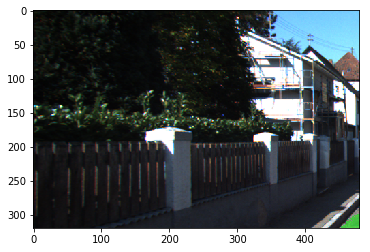

Accuracy :  0.99845064


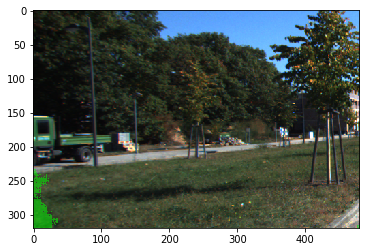

Accuracy :  0.9888021


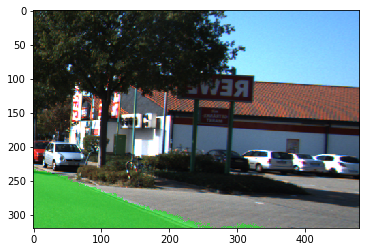

Accuracy :  0.98516285


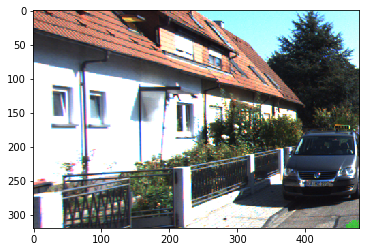

Accuracy :  0.974681


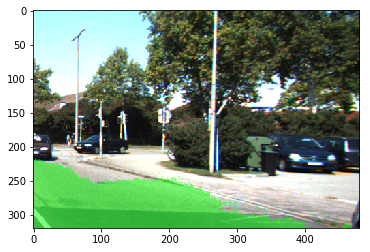

Accuracy :  0.96962243


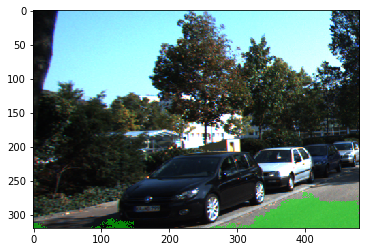

Accuracy :  0.9710612


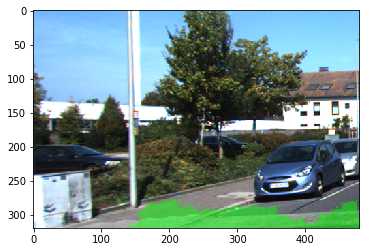

Accuracy :  0.95283204


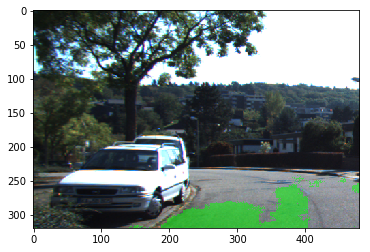

Accuracy :  0.9142513


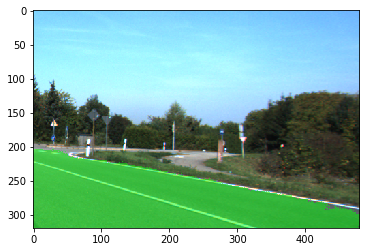

Accuracy :  0.9909376


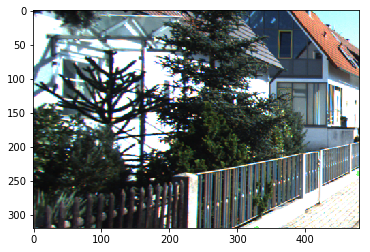

Accuracy :  0.9994076


In [10]:
with tf.Session() as sess:   
    print("Loading final model ")
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], config.final_model_dir)
    print("Final model loaded")
    test = [data.get_data_element("test_data",i) for i in range(10)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)